In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
loans = pd.read_csv('loan_data.csv')

Text(0.5, 0, 'FICO')

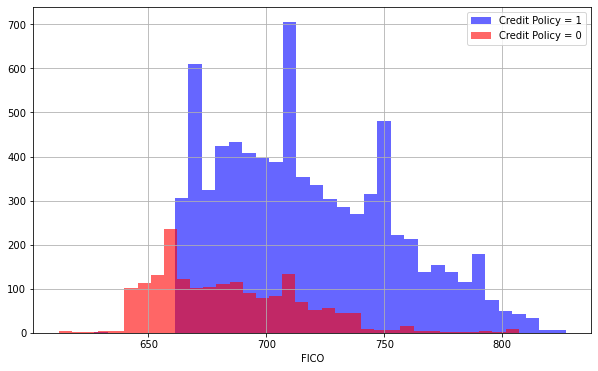

In [9]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha= 0.6,color='blue',bins=35, label = 'Credit Policy = 1')
loans[loans['credit.policy']==0]['fico'].hist(alpha= 0.6,color='red',bins=35, label = 'Credit Policy = 0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

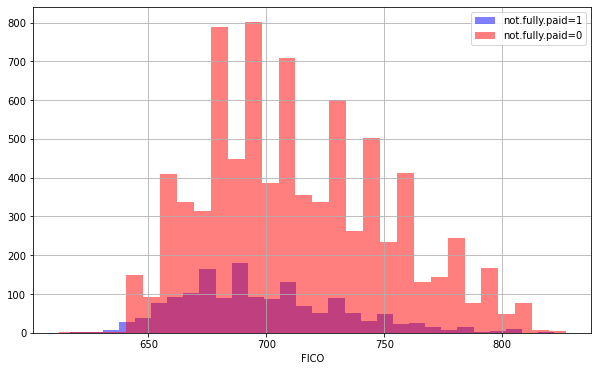

In [10]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

<AxesSubplot:xlabel='purpose', ylabel='count'>

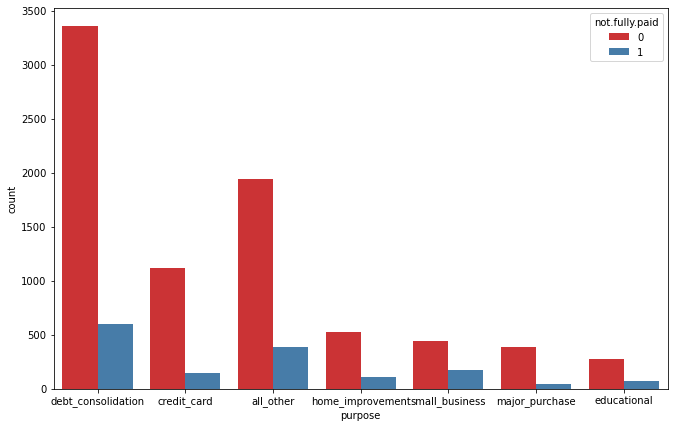

In [11]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

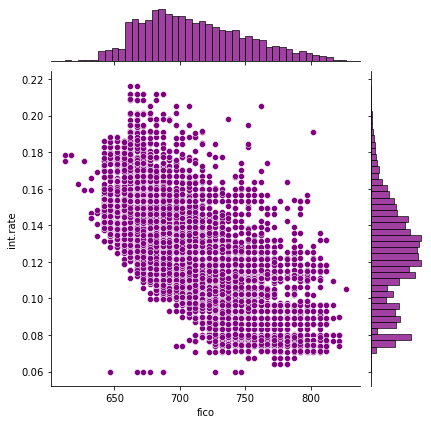

In [12]:
sns.jointplot(x= 'fico',y ='int.rate', data=loans, color='purple')

<Figure size 792x504 with 0 Axes>

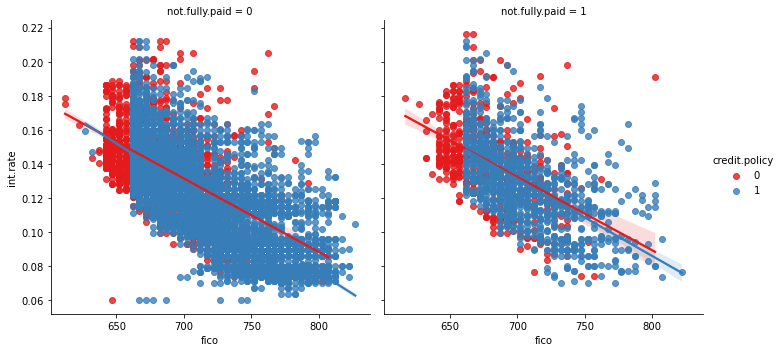

In [15]:
plt.figure(figsize=(11,7))
sns.lmplot(x= 'fico',y ='int.rate', data=loans,hue = 'credit.policy',
           col='not.fully.paid', palette='Set1')

In [18]:
cat_feat = ['purpose']

In [19]:
final_data = pd.get_dummies(loans, columns = cat_feat,drop_first= True)

In [20]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [22]:
from sklearn.model_selection import train_test_split
X= final_data.drop('not.fully.paid',axis=1)
y=final_data['not.fully.paid']

In [24]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dtree = DecisionTreeClassifier()

In [27]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [28]:
predictions = dtree.predict(X_test)

In [29]:
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [31]:
print(confusion_matrix(y_test,predictions))

[[2003  428]
 [ 343  100]]


In [32]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rtree = RandomForestClassifier(n_estimators=300)

In [48]:
rtree.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [49]:
pred = rtree.predict(X_test)

In [50]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.53      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.69      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



In [51]:
print(confusion_matrix(y_test,pred))

[[2422    9]
 [ 433   10]]
